# COWS example

This Jupyter Notebook is available [here](https://github.com/SimonPfeifer/cows/blob/master/docs/example.ipynb) and the Python .py file [here](https://github.com/SimonPfeifer/cows/blob/master/docs/example.py).

In [1]:
import cows
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def thick_slice(data, z, dz, operator='and'):
    '''Returns a slice of the data at z
        with thickness dz.
    '''
    zmin = int(z-np.round(dz/2))
    zmax = int(z+np.round(dz/2))
    if operator == 'and':
        return np.any(data[zmin:zmax], axis=0).astype(int)
    if operator == 'sum':
        return np.sum(data[zmin:zmax], axis=0)
    else:
        raise ValueError('Invalid operator: {}'.format(operator))
    

In [3]:
# Load the test data. It consists of a 64x64x64 cube of V-web data, a cosmic web classifier.
# In the context of the V-web, the values are:
# 0 - voids
# 1 - sheets
# 2 - filaments
# 3 - knots
data = np.load('../tests/test_data.npy')
ncells = data.shape[0]

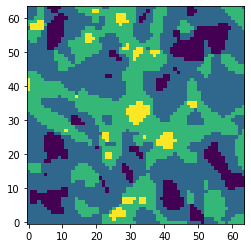

In [4]:
# Plot a slice of the V-web centred of a big knot
z = 11 # depth of slice
plt.imshow(data[z], origin='lower')
plt.show()

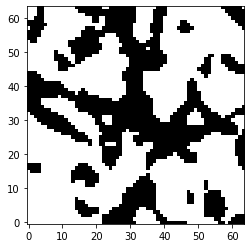

In [5]:
# Process the V-web data to generate the COWS input data.
# Set the filaments and knots to foreground value (1)
cows_input = np.zeros(data.shape)
cows_input[data==2] = 1 # filaments
cows_input[data==3] = 1 # knots

# Plot the same slice of input data
plt.imshow(cows_input[z], cmap='binary', origin='lower')
plt.show()

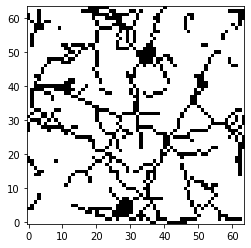

In [10]:
# Start the COWS method
# First, get the medial axis, the skeleton of the input data.
# The V-web data is a chuck from a periodic simulation, so periodic=False. If it was
# the full periodic simulation box, periodic=True.
skeleton = cows.skeletonize(cows_input, periodic=False)

# Plot a slice of the skeleton with some thickness, dz
dz = 10
plt.imshow(thick_slice(skeleton,z,dz,operator='and'), cmap='binary', origin='lower')
plt.show()

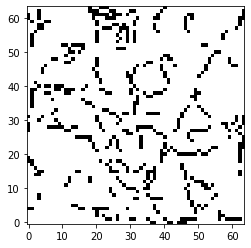

In [11]:
# Remove cells that are knots in the V-web
skeleton[data==3] = 0

# Separate the skeleton into filaments by removing cavities (blobs) and junctions
filaments = cows.separate_skeleton(skeleton, periodic=False)

# Plot a slice of the skeleton with some thickness, dz
plt.imshow(thick_slice(filaments,z,dz,operator='and'), cmap='binary', origin='lower')
plt.show()

In [14]:
# Generate a filament catalogue
catalogue = cows.gen_catalogue(filaments)

# The filament catalogue is formatted as follows:
# filament ID, filament length, X-, Y-, Z-position (on the grid), X-, Y-, Z-direction
print(catalogue[0])

[ 1. 33. 61. 16. 50.  0.  1.  0.]
